# Autoencoders

A simple concept, but applicable to many situations and tasks.
This chapter is very useful for a deeper understanding of them (Suggested reading) : https://www.deeplearningbook.org/contents/autoencoders.html <br>
A lot of the examples here are inspired from this guide: https://www.tensorflow.org/tutorials/generative/autoencoder#second_example_image_denoising<br>


In [1]:
import tensorflow


In [2]:
tensorflow.__version__

'2.6.0'

## General structure
Autoencoders have to main parts, the **encoder** which converts the input data into **h** which is a typically smaller dimmensional space than the input data. And a **decoder** which tries to convert that **h** back into the original image. Autoencoders are trained using **reconstruction error** which represents how different the outputed image is from the orignal.<br>
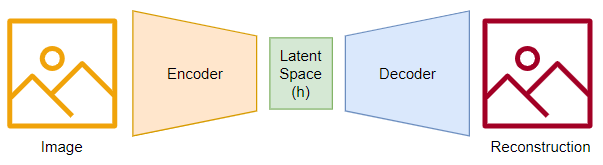<br>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

y_train = tf.keras.utils.to_categorical( y_train)
y_test = tf.keras.utils.to_categorical( y_test)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [20]:
# latent_dim = 28 

class Autoencoder(Model):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(2, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(2, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
# autoencoder.build((None, 28, 28, 1))
# autoencoder.save_weights("random_Autoencoder1_w.h5")

In [21]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0289 - val_loss: 0.0202
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0193 - val_loss: 0.0187
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0184 - val_loss: 0.0182
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0180 - val_loss: 0.0179
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0178 - val_loss: 0.0177
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0176 - val_loss: 0.0176
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0175 - val_loss: 0.0176
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0174 - val_loss: 0.0174
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0174 - val_loss: 0.0174
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.017

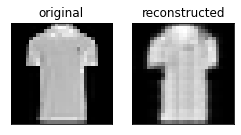

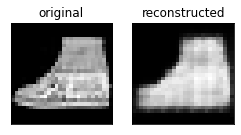

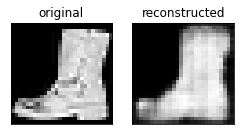

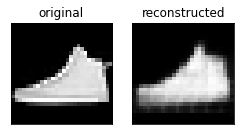

In [22]:
import random
for i, j in enumerate(random.sample(range(1, 6000), 4)):
    plt.figure(figsize = (4, 8))
    ax = plt.subplot(1, 2, 1)
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(x_test[j])
    ax = plt.subplot(1, 2, 2)
    plt.title("reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(autoencoder(x_test[j].reshape(1, 28, 28, 1))[0])

## Common Use Cases:
By itself this task doesn't really acheive much. However, what is interesting is the latent features that the autoencoder learns in order to compress the original image while maintaing enough information for reconstruction. Below are some common applications for autoencoders:

>## Feature extraction
The Encoder part of the network is good at extracting features that contain the most important and identifying information about the input image. So auto encoders could be trained with the intention of later graphting the Encoder onto the beginning of some other network.

In [120]:
autoencoder.encoder.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [23]:
basic_classifier = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(2, (3, 3), activation='relu', padding='same', strides=2),
      layers.Flatten(),
      layers.Dense(32, activation='relu'),
#       layers.Dropout(0.25),
      layers.Dense(10, activation='softmax')
])

basic_classifier.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [24]:
basic_classifier.fit(x_train, y_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6614 - accuracy: 0.7587 - val_loss: 0.5028 - val_accuracy: 0.8179
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4625 - accuracy: 0.8350 - val_loss: 0.4650 - val_accuracy: 0.8304
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4183 - accuracy: 0.8499 - val_loss: 0.4189 - val_accuracy: 0.8519
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3902 - accuracy: 0.8591 - val_loss: 0.4069 - val_accuracy: 0.8500
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3698 - accuracy: 0.8657 - val_loss: 0.3911 - val_accuracy: 0.8574
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3564 - accuracy: 0.8706 - val_loss: 0.3737 - val_accuracy: 0.8662
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3447 - accuracy: 0.8751 - val_loss: 0.3677 - val_accuracy:

In [25]:
class Encoder_classifier(Model):
    def __init__(self):
        super(Encoder_classifier, self).__init__()
        self.encoder = autoencoder.encoder
        self.classifier =  tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(32, activation='relu'),
    #       layers.Dropout(0.25),
            layers.Dense(10, activation='softmax')
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        label = self.classifier(encoded)
        return label
    
encoder_classifier = Encoder_classifier()


encoder_classifier.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])


In [26]:
encoder_classifier.fit(x_train, y_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7260 - accuracy: 0.7467 - val_loss: 0.5685 - val_accuracy: 0.7906
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5042 - accuracy: 0.8172 - val_loss: 0.5088 - val_accuracy: 0.8132
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4634 - accuracy: 0.8308 - val_loss: 0.4781 - val_accuracy: 0.8237
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4394 - accuracy: 0.8407 - val_loss: 0.4488 - val_accuracy: 0.8361
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4225 - accuracy: 0.8465 - val_loss: 0.4320 - val_accuracy: 0.8408
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4105 - accuracy: 0.8506 - val_loss: 0.4246 - val_accuracy: 0.8422
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4028 - accuracy: 0.8542 - val_loss: 0.4335 - val_accuracy:

>## Image denoising
This is an interesting application for autoencoders, the model is fed the original images with some added noise and the output is compared to the original image when calculating the reconstruction error. <br>
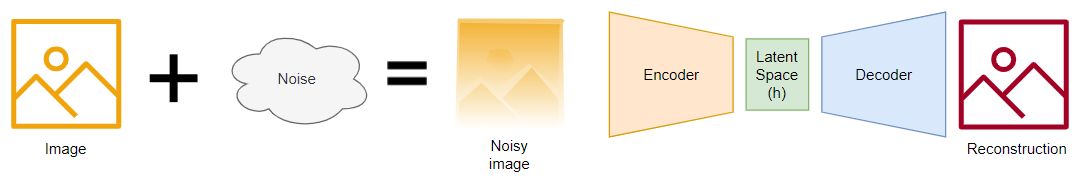

In [20]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

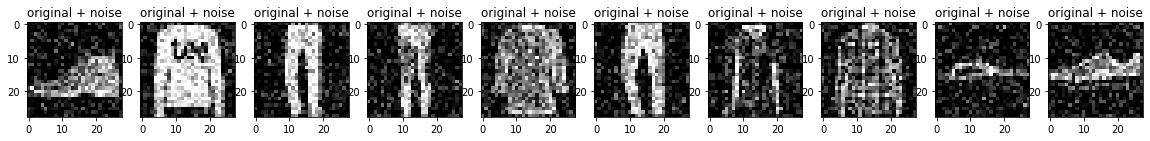

In [21]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [34]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

denoiser = Denoise()

denoiser.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [35]:
denoiser.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0171 - val_loss: 0.0102
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0081 - val_loss: 0.0080
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0078 - val_loss: 0.0078
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.007

In [46]:
decoded_imgs = denoiser(x_test_noisy)

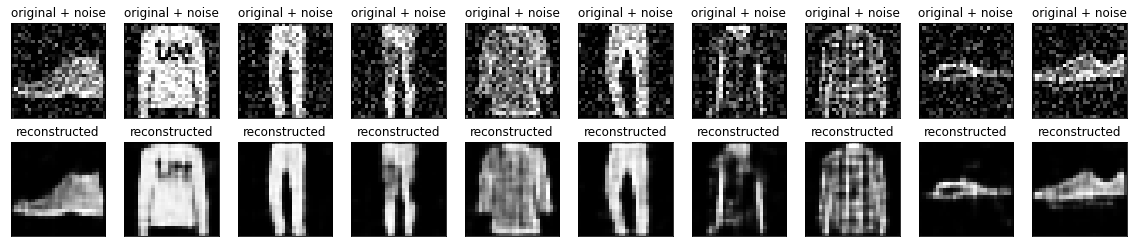

In [47]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

>## Anomaly detection
An autoencoder will be good at reconstructing data from the same distribution as the training set, but it will perform poorly on data from other distributions. So the reconstruction error of a trained autoencoder can be used to tell weather a sample is from the target distribution or is anomalous.

In [38]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [39]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

In [40]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [41]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

In [ ]:
bx = plt.subplot(1, 2, 1)

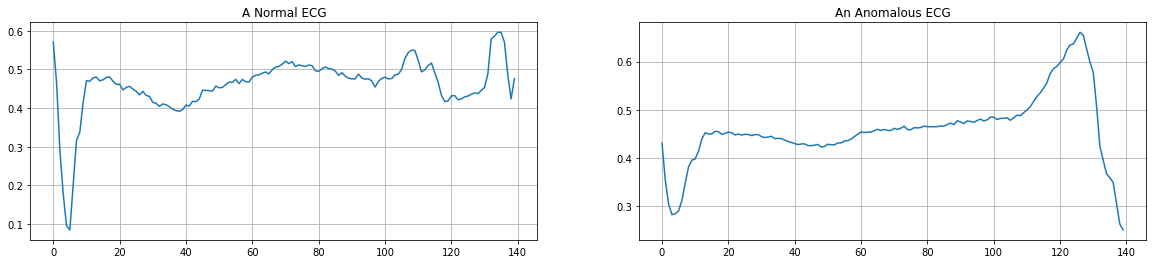

In [72]:
plt.figure(figsize=(20, 4))

bx = plt.subplot(1, 2, 1)
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
by = plt.subplot(1, 2, 2)
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

In [108]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

anamolysniffer = AnomalyDetector()

anamolysniffer.compile(optimizer='adam', loss='mae')


In [109]:
history = anamolysniffer.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(normal_test_data, normal_test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 0s 23ms/step - loss: 0.0580 - val_loss: 0.0573
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0569 - val_loss: 0.0562
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0559 - val_loss: 0.0551
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0547 - val_loss: 0.0539
Epoch 5/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0535 - val_loss: 0.0526
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0521 - val_loss: 0.0512
Epoch 7/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0507 - val_loss: 0.0497
Epoch 8/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0491 - val_loss: 0.0480
Epoch 9/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0474 - val_loss: 0.0462
Epoch 10/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0455 - val_loss: 0.0443
Epoch 11/20
5/5 [=====================

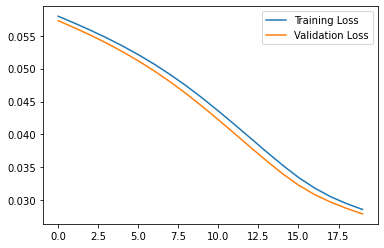

In [110]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

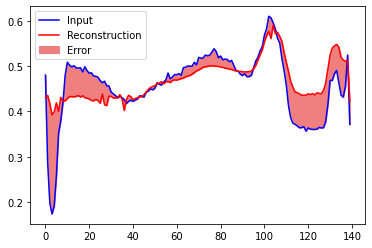

In [111]:
encoded_data = anamolysniffer.encoder(normal_test_data).numpy()
decoded_data = anamolysniffer.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

>## Learning a manifold (advance)

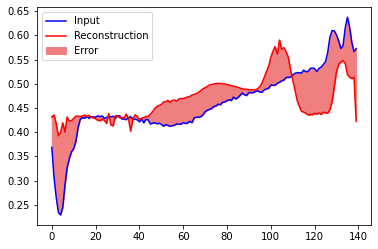

In [112]:
encoded_data = anamolysniffer.encoder(anomalous_test_data).numpy()
decoded_data = anamolysniffer.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

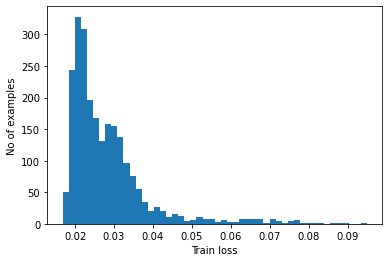

In [113]:
reconstructions = anamolysniffer.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [90]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.06233587


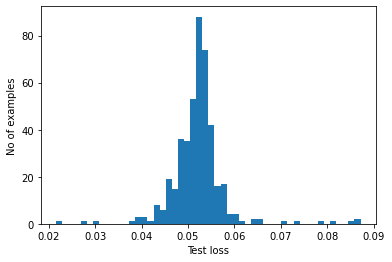

In [114]:
reconstructions = anamolysniffer.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()